In [1]:
import cv2
from dt_apriltags import Detector
import matplotlib.pyplot as plt
import numpy as np
import april_tag_following as atf
from pid import PID

tag translateion: [[ 0.06945575]
 [-0.11357916]
 [ 0.53989323]]
tag rotateions: [[-0.04756652 -0.99737066  0.0546735 ]
 [ 0.99573468 -0.04301414  0.08162248]
 [-0.07905614  0.0583228   0.99516259]]
x error: 136.56797808353804
y error: -223.31632354615363
Center: (960.0, 540.0)
X-error(PID): 27.72433856434429
Y-error(PID): -34.17009747601238


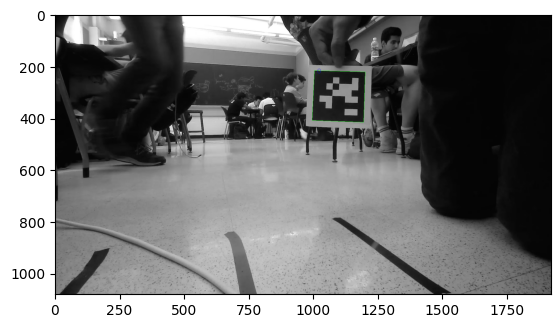

tag translateion: [[ 0.06940983]
 [-0.11348073]
 [ 0.53966214]]
tag rotateions: [[-0.04719458 -0.99750341  0.05253208]
 [ 0.99570176 -0.04278335  0.08214376]
 [-0.07969118  0.05618303  0.99523504]]
x error: 136.56741642601696
y error: -223.2543600857149
Center: (960.0, 540.0)
X-error(PID): 21.577644571810115
Y-error(PID): -24.110673973364136


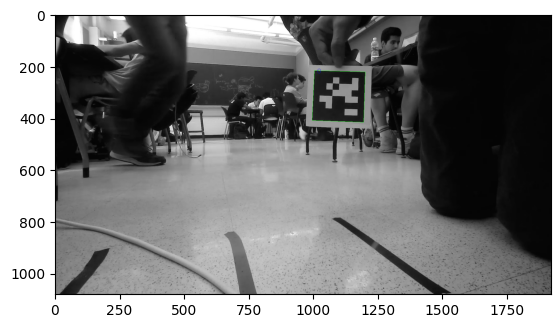

tag translateion: [[ 0.06933421]
 [-0.11333941]
 [ 0.53940458]]
tag rotateions: [[-0.04699719 -0.99752794  0.05224239]
 [ 0.99579995 -0.04267351  0.08100268]
 [-0.07857307  0.05582987  0.99534381]]
x error: 136.43961426280453
y error: -223.04455091715937
Center: (960.0, 540.0)
X-error(PID): 21.5550575414555
Y-error(PID): -24.08486901008851


In [2]:
vcap = cv2.VideoCapture("AprilTagTest.mkv")

x_pid = PID(0.158, 0.0, 0.025)
y_pid = PID(0.108, 0.0, 0.025)

frequency = 5
count = 0
while True:
    if count % frequency == 0:
        ret, frame = vcap.read()

        if not ret:
            break

        processed_image, tags, x_raw_error, y_raw_error = atf.detect_april_tags(frame)

        x_error = x_pid.update(x_raw_error)
        y_error = y_pid.update(y_raw_error)

        print(f"Center: {(frame.shape[1] / 2, frame.shape[0] / 2)}")
        print(f"X-error(PID): {x_error}")
        print(f"Y-error(PID): {y_error}")

        plt.imshow(processed_image)
        plt.show()

    count += 1